In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey_results_public.csv')

## Analytics Questions

Following are the list of analytics that are of interest for this project:
1. Which industry pay developers the most?
2. How does coding experience affect the level of pay?
3. What's the most popular method of learning to code?
4. Are you more likely to get a job as a developer if you have a master's degree?
5. What are the most desirable AI tools that developers want to work with?
6. What is the most common work setting?

## Data Exploratory

In [3]:
# Get dataframe statistics
stats = df.describe(include="all")
print(stats)

          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75%     49078.000000                             NaN              NaN   
max     65437.000000                             NaN              NaN   

                 Employment                            RemoteWork   Check  \
count                 65437                   

In [4]:
# View dataset shape
df.shape

(65437, 114)

In [5]:
# Column list
columns = df.columns
print(columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [6]:
# List column types
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Number of missing values for each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


<Axes: >

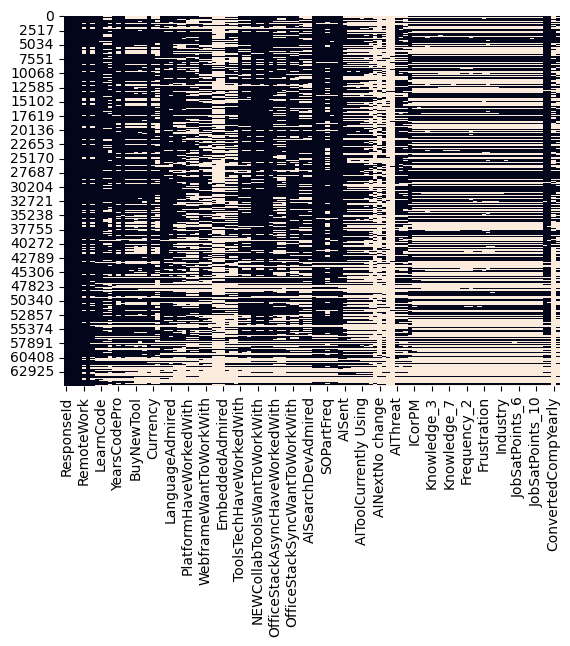

In [7]:
# Detect missing values in each column
print("Number of missing values for each column:")
print(df.isna().sum())
sns.heatmap(df.isna(), cbar=False)  # Visualize missing data

In [8]:
# Sample record
df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [9]:
# Check for duplicated rows
print(df.duplicated().sum())

0


## Data Cleaning

**Note: There are irrelevant data and missing values that we need to deal with before we can move to analysis**

Based on the 5 analytics questions, I identified list of required columns as following:
   - MainBranch
   - Age
   - RemoteWork
   - CodingActivities
   - EdLevel
   - LearnCode
   - LearnCodeOnline
   - YearsCode
   - YearsCodePro
   - Country
   - ConvertedCompYearly
   - Industry
   - AISearchDevWantToWorkWith

### Drop irrelevant columns

In [10]:
# Drop unrequired columns
required_columns = [
    'MainBranch',
    'Age',
    'RemoteWork',
    'CodingActivities',
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'YearsCode',
    'YearsCodePro',
    'Country',
    'ConvertedCompYearly',
    'Industry',
    'AISearchDevWantToWorkWith'
]

columns_to_drop = [item for item in df.columns if item not in required_columns] 

# print(columns_to_drop)

df = df.drop(columns_to_drop, axis = 1)

df.columns

Index(['MainBranch', 'Age', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro', 'Country',
       'AISearchDevWantToWorkWith', 'Industry', 'ConvertedCompYearly'],
      dtype='object')

## Analysis

**Note:Since not every rows have all the data for every questions, we will need to filter / select relevant records to answer each question**

### Question 1: Which industry pay developers the most?

In [11]:
# Display unique values for MainBranch column
df['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

**Note: We are interested in records from current developers so we will filter out the rest of records except for 'I am a developer by profession'**

In [12]:
# Create new dataframe for records from current developers
df = df[df['MainBranch'] == 'I am a developer by profession']
df.shape

(50207, 13)

In [13]:
# Remove record where the Industry and ConvertedCompYearly columns were not provided
df1 = df.dropna(subset=['Industry','ConvertedCompYearly'])
df1.shape

(15006, 13)

In [14]:
# Group the data by Industry and calculate the salary
pay_by_industries = df1.groupby('Industry')['ConvertedCompYearly'].mean().round().sort_values(ascending=False)
print(pay_by_industries)

Industry
Media & Advertising Services                  125427.0
Computer Systems Design and Services          121938.0
Fintech                                       101631.0
Insurance                                      98195.0
Government                                     90928.0
Healthcare                                     90676.0
Banking/Financial Services                     90338.0
Retail and Consumer Services                   89771.0
Other:                                         89684.0
Internet, Telecomm or Information Services     89288.0
Transportation, or Supply Chain                84799.0
Energy                                         84393.0
Manufacturing                                  78792.0
Software Development                           77281.0
Higher Education                               70493.0
Name: ConvertedCompYearly, dtype: float64


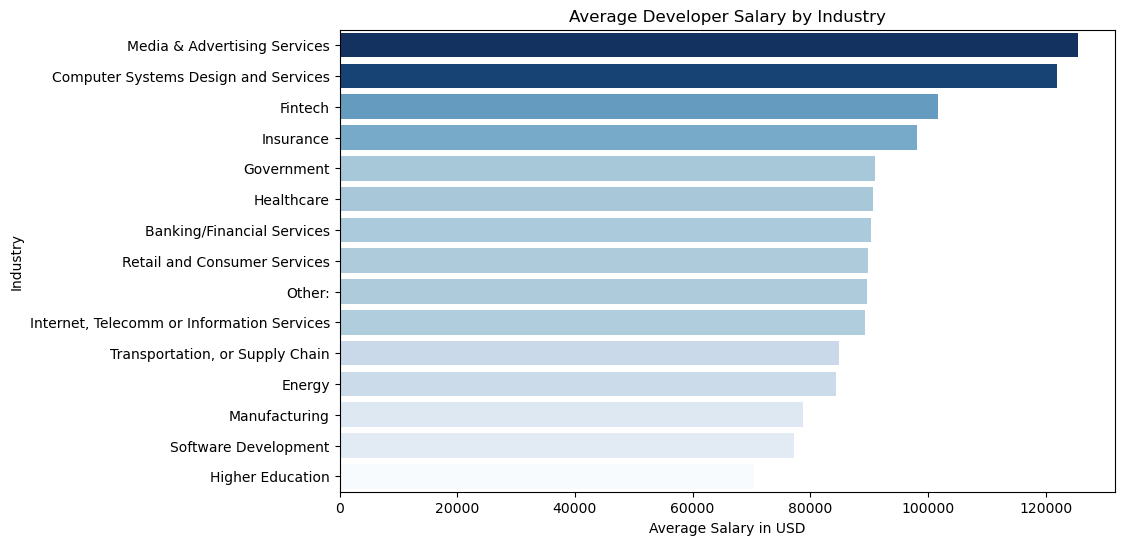

In [15]:
# Create a bar plot to visualize the above information
norm = plt.Normalize(pay_by_industries.values.min(), pay_by_industries.values.max())

# Create a colormap, e.g., "Blues" where the darker shades represent higher values
colors = plt.cm.Blues(norm(pay_by_industries.values))

plt.figure(figsize=(10, 6))
sns.barplot(x=pay_by_industries.values, y=pay_by_industries.index, palette=colors)

# Set title and labels
plt.title('Average Developer Salary by Industry')
plt.xlabel('Average Salary in USD')
plt.ylabel('Industry')

# Show the plot
plt.show()

### Question 2: How does coding experience affect the level of pay?

**Note: For this question, we are interested in data in columns YearsCode and ConvertedCompYearly. We also want to look at United State market only to avoid geographical inconsistency**

In [16]:
# View uniques value of 'YearsCode'
df['YearsCode'].unique()

array([nan, '20', '37', '9', '15', '30', '31', '6', '12', '22', '36',
       '25', '44', '24', '7', '18', '3', '10', '8', '1',
       'More than 50 years', '11', '40', '42', '34', '19', '4', '29',
       '35', '5', '16', '33', '13', '23', '14', '28', '17', '21', '43',
       '39', '32', '26', '41', '2', '45', '27', '38', '47', '48',
       'Less than 1 year', '46', '50', '49'], dtype=object)

**Note: We notice that there are responds with 'More than 50 years' and 'Less than 1 year', with this value we cannot sort the data. Solution: update 'Less than 1 year' to '0.5' and 'More than 50 years' to '50.5'**

In [17]:
# Modify values
df['YearsCode'] = np.where(df['YearsCode'] == 'Less than 1 year','0.5',df['YearsCode'])
df['YearsCode'] = np.where(df['YearsCode'] == 'More than 50 years','50.5',df['YearsCode'])
df['YearsCode'].unique()

array([nan, '20', '37', '9', '15', '30', '31', '6', '12', '22', '36',
       '25', '44', '24', '7', '18', '3', '10', '8', '1', '50.5', '11',
       '40', '42', '34', '19', '4', '29', '35', '5', '16', '33', '13',
       '23', '14', '28', '17', '21', '43', '39', '32', '26', '41', '2',
       '45', '27', '38', '47', '48', '0.5', '46', '50', '49'],
      dtype=object)

In [18]:
# Remove record where the YearsCode and ConvertedCompYearly columns were not provided
df2 = df.dropna(subset=['YearsCode','ConvertedCompYearly'])
df2.shape

(21508, 13)

In [19]:
# Filter out on records from the United States developers
df2 = df2[df2['Country'] == 'United States of America']
df2.shape

(4255, 13)

In [20]:
# Sort the value from least to highest years of coding experience
df2.loc[:,'YearsCode'] = pd.to_numeric(df2['YearsCode'], errors='coerce')
df2.sort_values('YearsCode')
df2['YearsCode'] = df2['YearsCode'].astype(float)
df2['YearsCode'].unique()

array([ 7. , 38. , 20. , 25. , 10. , 28. , 30. , 47. ,  6. , 19. , 24. ,
       21. , 11. , 15. , 26. , 40. , 33. , 31. , 13. , 14. ,  5. , 12. ,
       32. , 17. ,  4. , 45. , 18. , 36. , 35. ,  9. , 23. , 29. , 16. ,
       22. , 42. , 27. , 50.5,  8. ,  2. , 37. , 44. , 50. , 34. ,  3. ,
       43. , 39. , 41. , 48. , 49. , 46. ,  1. ,  0.5])

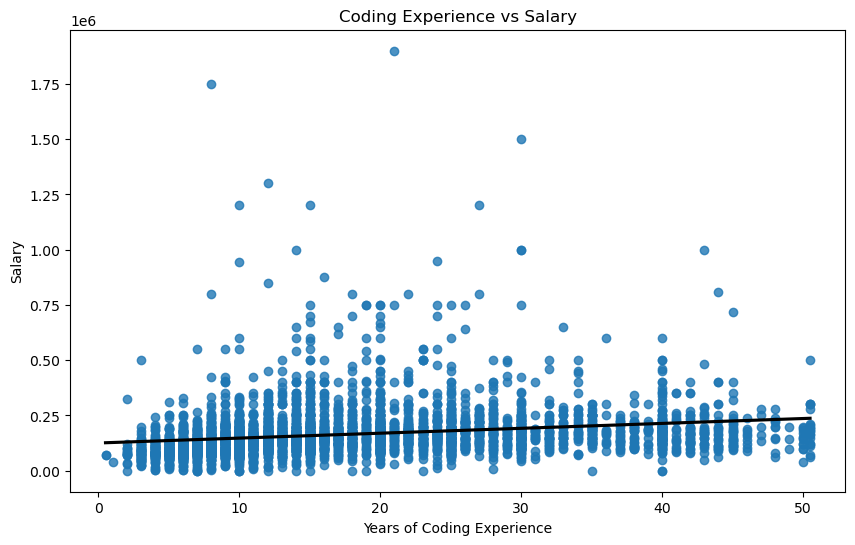

In [21]:
# Create a scatter plot to compare coding experience and salary.
plt.figure(figsize=(10, 6))
sns.regplot(x='YearsCode', y='ConvertedCompYearly', data=df2, scatter=True, ci=None, line_kws={'color': 'black'})
plt.title('Coding Experience vs Salary')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Salary')
plt.show()

### Question 3: What's the most popular method of learning to code?

**Note: For this question, we would be interested in Columns 'LearnCode' and 'LearnCodeOnline'**

First we want to drop missing values for 'LearnCode' and 'LearnCodeOnline'. 
We will separate them into 2 dataframes to have 2 analysis:
1. Methods of learning code in general  
2. Methods of learning code online

In [22]:
# 1) Methods of learning code in general
df3 = df.dropna(subset=['LearnCode'])
df3_exploded = df3['LearnCode'].str.split(';').explode()
df3_exploded_values_counts = df3_exploded.value_counts()
print(df3_exploded_values_counts.index)

# We want to rename some of the categories for easy reading
df3_exploded_values_counts = df3_exploded_values_counts.rename({'Other (please specify):': 'Others', 'School (i.e., University, College, etc)': 'Educational Institution'})
print(df3_exploded_values_counts)

Index(['Other online resources (e.g., videos, blogs, forum, online community)',
       'Books / Physical media', 'Online Courses or Certification',
       'On the job training', 'School (i.e., University, College, etc)',
       'Colleague', 'Coding Bootcamp', 'Friend or family member',
       'Other (please specify):'],
      dtype='object', name='LearnCode')
LearnCode
Other online resources (e.g., videos, blogs, forum, online community)    38321
Books / Physical media                                                   24081
Online Courses or Certification                                          23675
On the job training                                                      23595
Educational Institution                                                  23367
Colleague                                                                12336
Coding Bootcamp                                                           4872
Friend or family member                                                   4

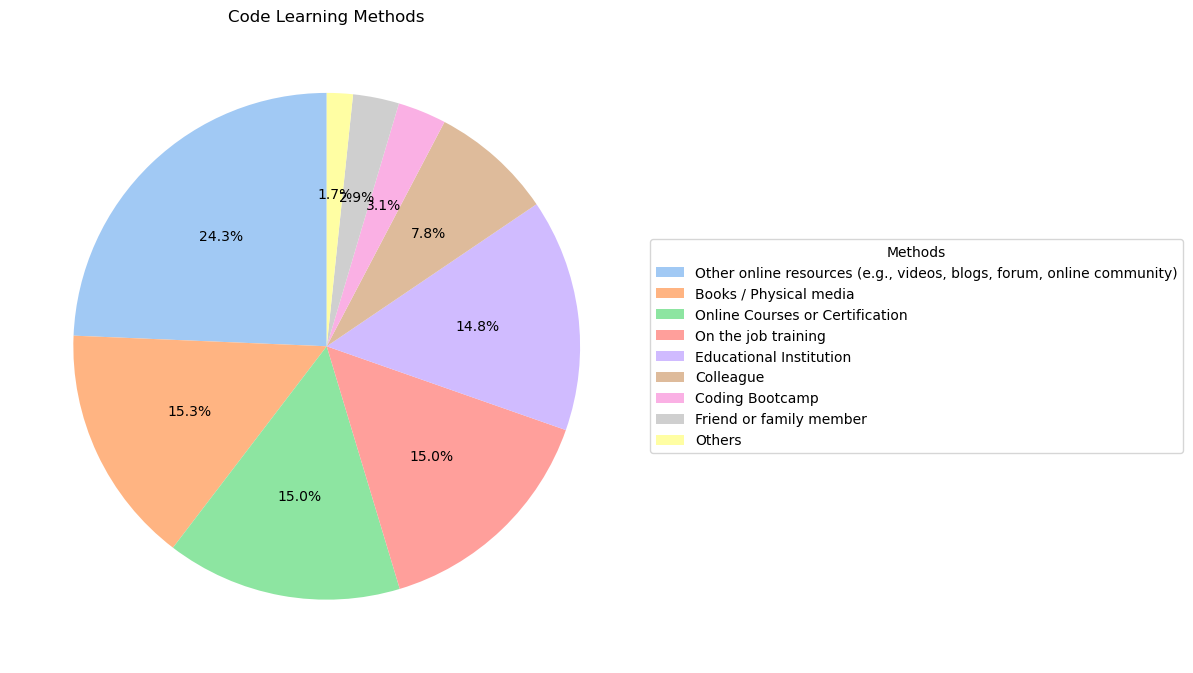

In [23]:
# Create a pie chart for LearnCode
# Use a Seaborn color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(df3_exploded_values_counts)]

# Create a pie chart
plt.figure(figsize=(12, 12))
wedges,_, autotexts = plt.pie(df3_exploded_values_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Set equal aspect ratio to ensure the pie is circular
plt.gca().set_aspect('equal')

# Add a title
plt.title('Code Learning Methods')

# Add the legend with categories and colors
plt.legend(wedges, df3_exploded_values_counts.index, title="Methods", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Show the pie chart
plt.tight_layout()
plt.show()

In [24]:
# 2) Methods of learning code online
df4 = df.dropna(subset=['LearnCodeOnline'])
df4_exploded = df3['LearnCodeOnline'].str.split(';').explode()
df4_exploded_values_counts = df4_exploded.value_counts()
print(df4_exploded_values_counts.index)

# We want to rename some of the categories for easy reading
df4_exploded_values_counts = df4_exploded_values_counts.rename({'Other (please specify):': 'Others', 'Auditory material (e.g., podcasts)': 'Auditory material', 'Online challenges (e.g., daily or weekly coding challenges)':'Coding Challenge'})
print(df4_exploded_values_counts)

Index(['Technical documentation', 'Stack Overflow', 'Written Tutorials',
       'Blogs', 'How-to videos', 'Video-based Online Courses', 'Books',
       'Social Media', 'AI', 'Written-based Online Courses',
       'Interactive tutorial',
       'Online challenges (e.g., daily or weekly coding challenges)',
       'Coding sessions (live or recorded)', 'Certification videos',
       'Auditory material (e.g., podcasts)', 'Programming Games',
       'Other (Please specify):'],
      dtype='object', name='LearnCodeOnline')
LearnCodeOnline
Technical documentation               32646
Stack Overflow                        30617
Written Tutorials                     26399
Blogs                                 24419
How-to videos                         20389
Video-based Online Courses            19244
Books                                 18207
Social Media                          15396
AI                                    13733
Written-based Online Courses          12831
Interactive tutorial 

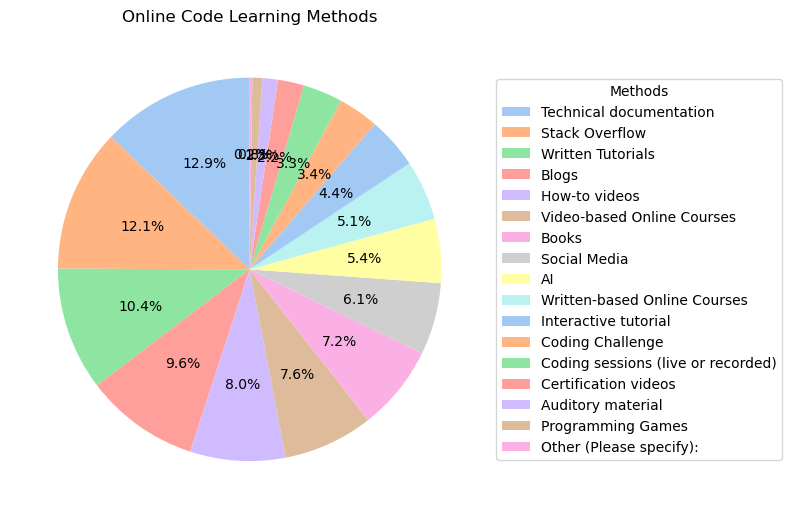

In [25]:
# Create a pie chart for LearnCodeOnline
# Use a Seaborn color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(df4_exploded_values_counts)]

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges,_, autotexts = plt.pie(df4_exploded_values_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Set equal aspect ratio to ensure the pie is circular
plt.gca().set_aspect('equal')

# Add the legend with categories and colors
plt.legend(wedges, df4_exploded_values_counts.index, title="Methods", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Add a title
plt.title('Online Code Learning Methods')

# Show the pie chart
plt.tight_layout()
plt.show()

### Question 4: Are you more likely to get a job as a developer if you have a master's degree?

**Note: In this question, we are interested in content of EdLevel column, we want to see if most current developers have a master degree**

In [26]:
# View unique values
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [27]:
# Remove records with EdLevel value missing
df5 = df.dropna(subset=['EdLevel'])
df5['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)', 'Something else'],
      dtype=object)

In [28]:
# Count the number of developers based on their highest level of education
df5_value_counts = df5['EdLevel'].value_counts()
df5_value_counts

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          21398
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13149
Some college/university study without earning a degree                                 5482
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2703
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         1919
Associate degree (A.A., A.S., etc.)                                                    1430
Something else                                                                          550
Primary/elementary school                                                               302
Name: count, dtype: int64

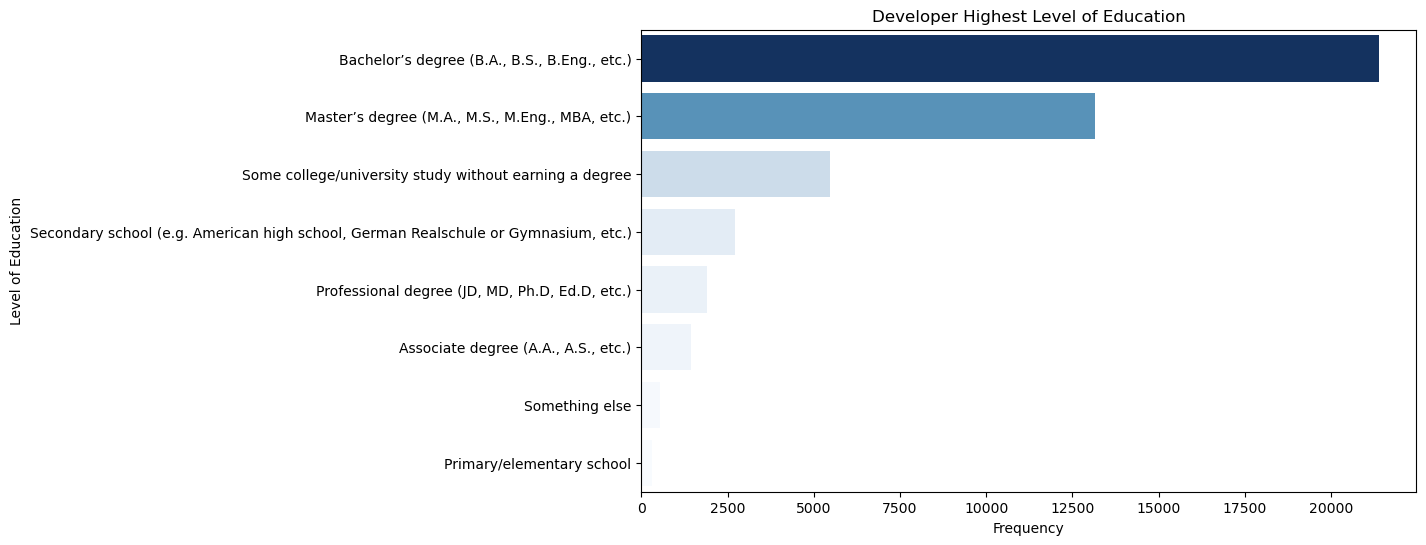

In [29]:
# Create a horizontal bar chart to display this information
norm = plt.Normalize(df5_value_counts.values.min(), df5_value_counts.values.max())

# Create a colormap, e.g., "Blues" where the darker shades represent higher values
colors = plt.cm.Blues(norm(df5_value_counts.values))

plt.figure(figsize=(10, 6))
sns.barplot(x=df5_value_counts.values, y=df5_value_counts.index, palette=colors)

# Set title and labels
plt.title('Developer Highest Level of Education')
plt.xlabel('Frequency')
plt.ylabel('Level of Education')

# Show the plot
plt.show()

### Question 5: What are the most desirable AI tools that developers want to work with?

**In this question, we are interested in column AISearchDevWantToWorkWith**

In [30]:
# Remove records with no data for AISearchDevWantToWorkWith
df6 = df.dropna(subset=['AISearchDevWantToWorkWith'])
df6.shape

(28664, 13)

In [31]:
# Explode column AISearchDevWantToWorkWith
df6_exploded = df6['AISearchDevWantToWorkWith'].str.split(';').explode()
df6_exploded_value_counts = df6_exploded.value_counts()
df6_exploded_value_counts

AISearchDevWantToWorkWith
ChatGPT                      22315
GitHub Copilot               15083
Google Gemini                 7049
Visual Studio Intellicode     4176
Bing AI                       2878
Claude                        2801
Codeium                       1769
Perplexity AI                 1542
WolframAlpha                  1349
Meta AI                       1245
Phind                          878
Amazon Q                       833
Tabnine                        816
OpenAI Codex                   560
Whispr AI                      369
Cody                           351
Snyk Code                      295
You.com                        245
Quora Poe                      173
Lightning AI                   150
Replit Ghostwriter              96
AskCodi                         85
Metaphor                        68
Neeva AI                        58
Andi                            55
Name: count, dtype: int64

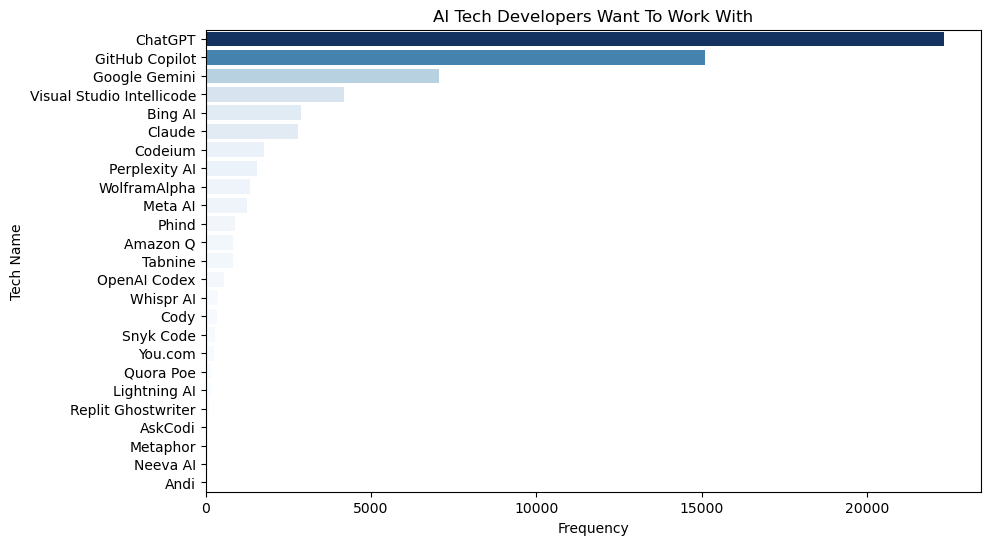

In [32]:
# Create a horizontal bar chart to display this information
norm = plt.Normalize(df6_exploded_value_counts.values.min(), df6_exploded_value_counts.values.max())

# Create a colormap, e.g., "Blues" where the darker shades represent higher values
colors = plt.cm.Blues(norm(df6_exploded_value_counts.values))

plt.figure(figsize=(10, 6))
sns.barplot(x=df6_exploded_value_counts.values, y=df6_exploded_value_counts.index, palette=colors)

# Set title and labels
plt.title('AI Tech Developers Want To Work With')
plt.xlabel('Frequency')
plt.ylabel('Tech Name')

# Show the plot
plt.show()

### Question 6: What is the most common work setting?

**Note: For this question, we are interested in column RemoteWork which has information on the work setting of the developers**

In [33]:
# View unique values
df['RemoteWork'].unique()

array(['Remote', nan, 'In-person', 'Hybrid (some remote, some in-person)'],
      dtype=object)

In [34]:
# Remove records with missing values for RemoteWork
df7 = df.dropna(subset=['RemoteWork'])
df7['RemoteWork'].unique()

array(['Remote', 'In-person', 'Hybrid (some remote, some in-person)'],
      dtype=object)

In [35]:
# Count the number of developers for each work setting
df7_value_counts = df['RemoteWork'].value_counts()
print(df7_value_counts.index)

# Rename 'Hybrid (some remote, some in-person)' to 'Hybrid'
df7_value_counts = df7_value_counts.rename({'Hybrid (some remote, some in-person)':'Hybrid'})
df7_value_counts

Index(['Hybrid (some remote, some in-person)', 'Remote', 'In-person'], dtype='object', name='RemoteWork')


RemoteWork
Hybrid       19767
Remote       18759
In-person     8697
Name: count, dtype: int64

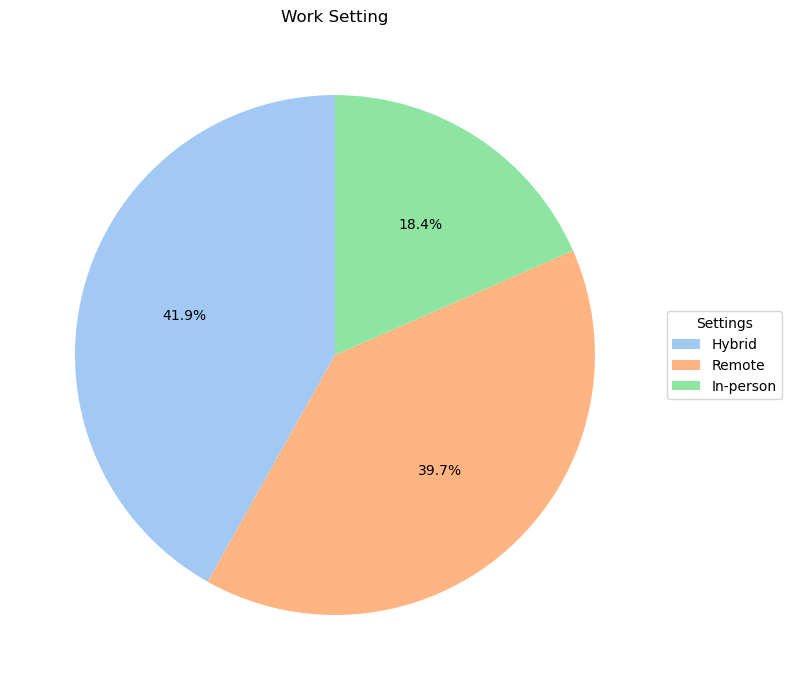

In [36]:
# Use a Seaborn color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(df7_value_counts)]

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges,_, autotexts = plt.pie(df7_value_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Set equal aspect ratio to ensure the pie is circular
plt.gca().set_aspect('equal')

# Add the legend with categories and colors
plt.legend(wedges, df7_value_counts.index, title="Settings", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Add a title
plt.title('Work Setting')

# Show the pie chart
plt.tight_layout()
plt.show()
